In [2]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [4]:
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [5]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

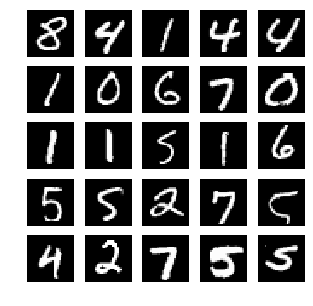

In [6]:
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()

In [7]:
# Keras implementation of the MNIST digit classifier model using MLP
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)  

In [8]:
# loss function for one-hot vector
# use of adam optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.4339 - acc: 0.8660
Epoch 2/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.1960 - acc: 0.9407
Epoch 3/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.1557 - acc: 0.9536
Epoch 4/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.1318 - acc: 0.9605
Epoch 5/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1136 - acc: 0.9651
Epoch 6/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.1066 - acc: 0.9668
Epoch 7/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0944 - acc: 0.9707
Epoch 8/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0839 - acc: 0.9737
Epoch 9/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0822 - acc: 0.9739 0s - loss: 0.0821 - acc: 0.97
Epoch 10/20
60000/60